In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///C:\\Users\\diana\\OneDrive\\Documents\\DA Bootcamp\\sqlalchemy-challenge\\SurfsUp\\Resources\\hawaii.sqlite")

In [13]:
#Set path
database_path = "sqlite:///C:\\Users\\diana\\OneDrive\\Documents\\DA Bootcamp\\sqlalchemy-challenge\\SurfsUp\\Resources\\hawaii.sqlite"



In [14]:
#Review table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [15]:
#Declaration of base
Base = automap_base()

In [16]:
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [17]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [18]:
measurement = Base.classes.measurement

In [19]:
station = Base.classes.station

In [20]:
# Create a session
session = Session(engine)

In [21]:
#Data review, measurements
first_row_measurement = session.query(measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x13eb37a6ec0>,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08}

In [22]:
#Data review, stations
first_row_station = session.query(station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x13eb36e9330>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

In [23]:
# Most recent date in the data set.

most_recent_date = session.query(measurement).order_by(measurement.date.desc()).first()
print(f"The most recent date in the data set is {most_recent_date.date}.")

The most recent date in the data set is 2017-08-23.


In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
starting_date = dt.datetime.strptime(most_recent_date.date, '%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
previous_year = starting_date - dt.timedelta(days=365)
print(previous_year)


2016-08-23


In [25]:
# Perform a query to retrieve the data and precipitation scores
precipitation_scores_df = session.query(measurement.date, measurement.prcp).filter(measurement.date >= previous_year).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_scores_df = pd.DataFrame(precipitation_scores_df,columns=['Date Measured', 'Precipitation']).set_index('Date Measured')
precipitation_scores_df


,Precipitation
Date Measured,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [26]:
precipitation_scores_df = precipitation_scores_df.sort_values(by='Date Measured')
precipitation_scores_df

,Precipitation
Date Measured,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [27]:
from matplotlib.pyplot import figure


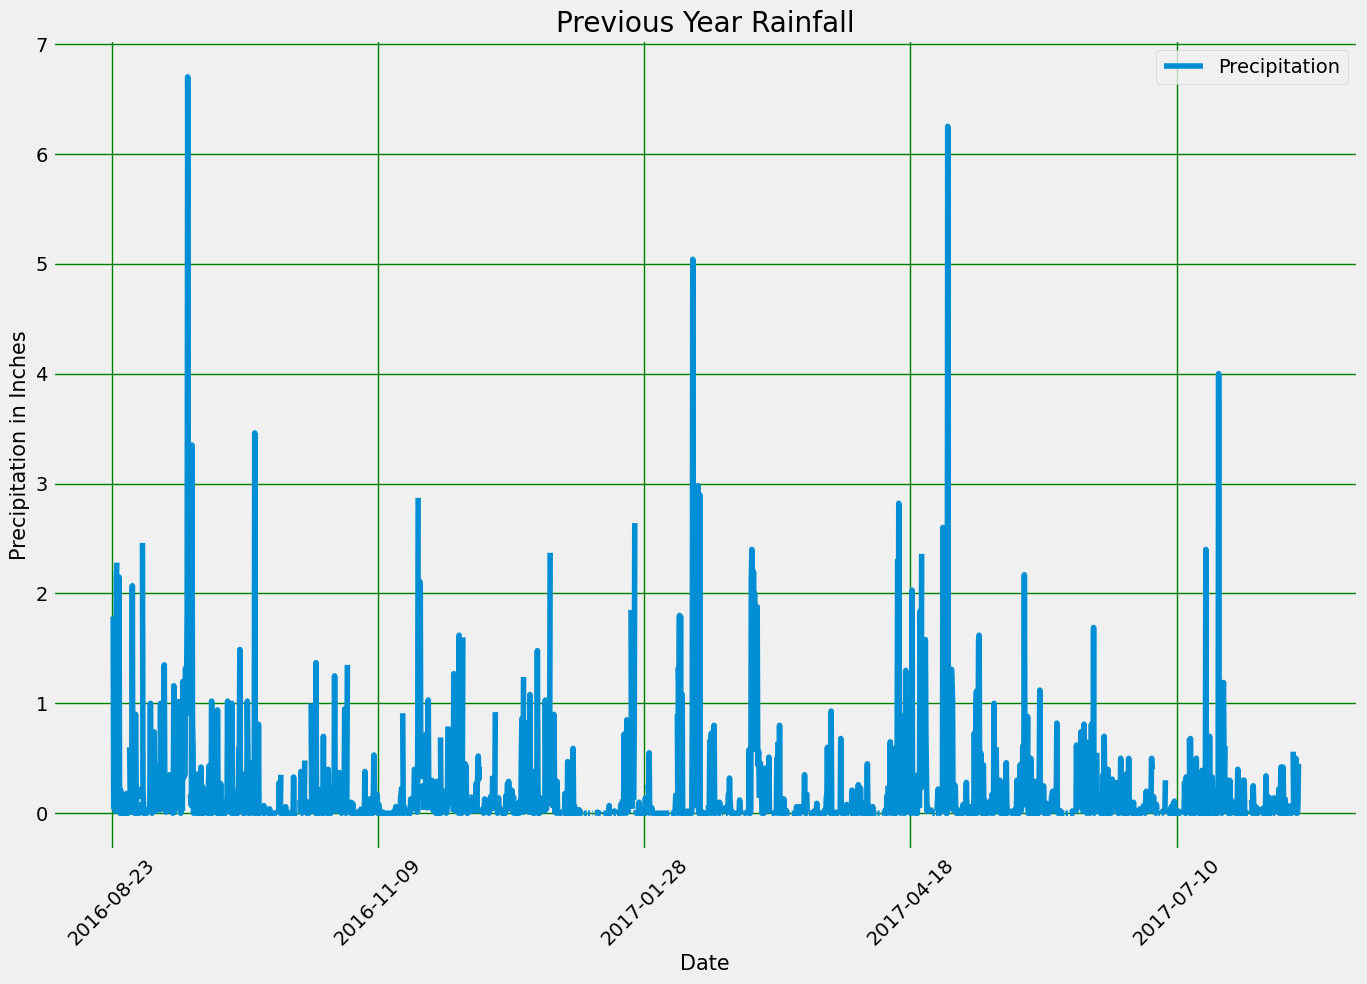

In [28]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_scores_df.plot(figsize=(15,10))
plt.tick_params(grid_color='g')
plt.xticks(rotation=45)
plt.title("Previous Year Rainfall")
plt.ylabel("Precipitation in Inches", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.legend(loc='upper right')
plt.savefig("Precip_Analysis.png", bbox_inches='tight')
plt.show()

In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_scores_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [30]:
# Design a query to calculate the total number stations in the dataset
number_of_stations = session.query(station.name).count()
print(f"The total number of stations in the dataset is {number_of_stations}")

The total number of stations in the dataset is 9


In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
most_activity = most_active_stations [0][0]
print(f"The station with the greatest number of observations was station {most_activity}.")

The station with the greatest number of observations was station USC00519281.


In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
minimum_temp = round(session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').first()[0],0)
maximum_temp = round(session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').first()[0],0)                      
average_temp = round(session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').first()[0],0)
print(f"The lowest temperature at the most active station was {minimum_temp} degrees F.")
print(f"The highest temperature at the most active station was {maximum_temp} degrees F.")
print(f"The average temperature at the most active station was {average_temp} degrees F.")

The lowest temperature at the most active station was 54.0 degrees F.
The highest temperature at the most active station was 85.0 degrees F.
The average temperature at the most active station was 72.0 degrees F.


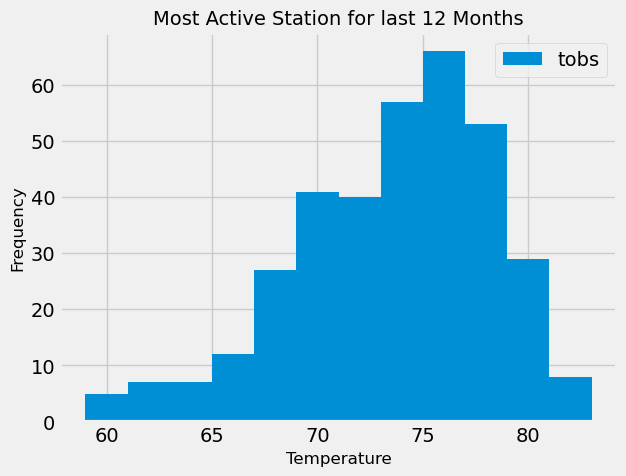

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observed_temp = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').\
                                filter(measurement.date >= previous_year).\
                                order_by(measurement.date.desc()).all()

observed_temp_df = pd.DataFrame(observed_temp, columns=['tobs'])
observed_temp_df.plot.hist(bins=12)
plt.title("Most Active Station for last 12 Months", fontsize=14)
plt.xlabel("Temperature", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.savefig("Most_Active_Station.png", bbox_inches='tight')

# Close Session

In [ ]:
#Close session
session.close()